---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

---

In [2]:
# Import libraries. You may or may not use all of these.
# !pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
dataset_path = "insurance.csv"
dataset = pd.read_csv(dataset_path)
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
catColumns = ["sex", "smoker", "region"]
dataset = pd.get_dummies(dataset, columns = catColumns, drop_first=True)

dataset.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [6]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [7]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.0,26.0,39.0,51.0,64.0
bmi,1070.0,30.737290,6.065193,16.0,26.3,30.5,34.8,53.1
children,1070.0,1.093458,1.211364,0.0,0.0,1.0,2.0,5.0
sex_male,1070.0,0.498131,0.500230,0.0,0.0,0.0,1.0,1.0
smoker_yes,1070.0,0.199065,0.399484,0.0,0.0,0.0,0.0,1.0
region_northwest,1070.0,0.235514,0.424518,0.0,0.0,0.0,0.0,1.0
region_southeast,1070.0,0.281308,0.449848,0.0,0.0,0.0,1.0,1.0
region_southwest,1070.0,0.234579,0.423934,0.0,0.0,0.0,0.0,1.0


In [8]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [9]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='relu')
  ])
optimizer = tf.keras.optimizers.RMSprop()

model.compile(loss='mae',
              optimizer=optimizer,
              metrics=['mae','mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 16,193
Trainable params: 16,193
Non-trainable params: 0
____________________________________________________

In [11]:
EPOCHS = 100
history = model.fit(train_dataset, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=1, callbacks=[tf.keras.callbacks.ModelCheckpoint("./checkpoint", save_best_only=True, monitor='val_loss')])

Epoch 1/100
27/27 [==============================] - 0s 4ms/step - loss: 12713.3320 - mae: 12713.3320 - mse: 301912000.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 12713.3340 - mae: 12713.3340 - mse: 301912000.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 12713.3330 - mae: 12713.3330 - mse: 301912064.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 12713.3320 - mae: 12713.3320 - mse: 301912032.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 12713.3311 - mae: 12713.3311 - mse: 301912032.0000 - val_loss: 14429.4287 - val_mae: 14429.4

27/27 [==============================] - 0s 3ms/step - loss: 12713.3330 - mae: 12713.3330 - mse: 301912032.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 43/100
27/27 [==============================] - 0s 3ms/step - loss: 12713.3320 - mae: 12713.3320 - mse: 301912000.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 44/100
27/27 [==============================] - 0s 3ms/step - loss: 12713.3320 - mae: 12713.3320 - mse: 301912064.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 45/100
27/27 [==============================] - 0s 3ms/step - loss: 12713.3340 - mae: 12713.3340 - mse: 301912032.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 46/100
27/27 [==============================] - 0s 3ms/step - loss: 12713.3320 - mae: 12713.3320 - mse: 301912032.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 47/100
27/27 [=============

Epoch 84/100
27/27 [==============================] - 0s 2ms/step - loss: 12713.3340 - mae: 12713.3340 - mse: 301912064.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 85/100
27/27 [==============================] - 0s 2ms/step - loss: 12713.3320 - mae: 12713.3320 - mse: 301912032.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 86/100
27/27 [==============================] - 0s 2ms/step - loss: 12713.3330 - mae: 12713.3330 - mse: 301912000.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 87/100
27/27 [==============================] - 0s 2ms/step - loss: 12713.3340 - mae: 12713.3340 - mse: 301912000.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 88/100
27/27 [==============================] - 0s 2ms/step - loss: 12713.3320 - mae: 12713.3320 - mse: 301912032.0000 - val_loss: 14429.4287 - val_mae: 14429.4287 - val_mse: 363358720.0000
Epoch 89/100
27/27 [

9/9 - 0s - loss: 14124.3096 - mae: 14124.3096 - mse: 356365920.0000
Testing set Mean Abs Error: 14124.31 expenses
The Mean Abs Error must be less than 3500. Keep trying.


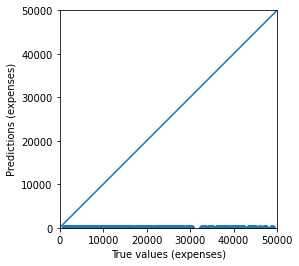

In [12]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
    print("You passed the challenge. Great job!")
else:
    print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
